# $Telco Project Data$

### Imports

In [153]:
import pandas as pd
import numpy as np
import wrangle as w
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

# to see all columns in wide datasets
pd.set_option('display.max_columns', None)

import seaborn as sns

# train test split from sklearn
from sklearn.model_selection import train_test_split


In [2]:
# acquire telco data 
df = w.get_telco_data()

In [3]:
df.columns

Index(['payment_type_id', 'internet_service_type_id', 'contract_type_id',
       'customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing', 'monthly_charges',
       'total_charges', 'churn', 'contract_type', 'internet_service_type',
       'payment_type'],
      dtype='object')

In [4]:
df.dtypes

payment_type_id               int64
internet_service_type_id      int64
contract_type_id              int64
customer_id                  object
gender                       object
senior_citizen                int64
partner                      object
dependents                   object
tenure                        int64
phone_service                object
multiple_lines               object
online_security              object
online_backup                object
device_protection            object
tech_support                 object
streaming_tv                 object
streaming_movies             object
paperless_billing            object
monthly_charges             float64
total_charges                object
churn                        object
contract_type                object
internet_service_type        object
payment_type                 object
dtype: object

In [5]:
df.shape


(7043, 24)

In [6]:
df.total_charges.value_counts()

           11
20.2       11
19.75       9
19.9        8
20.05       8
           ..
2387.75     1
6302.8      1
2058.5      1
829.55      1
3707.6      1
Name: total_charges, Length: 6531, dtype: int64

# prepare

In [7]:
# cleaning data
df = w.prep_telco(df)

In [8]:
df

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,gender_Female,gender_Male,partner_No,partner_Yes,dependents_No,dependents_Yes,phone_service_No,phone_service_Yes,multiple_lines_No,multiple_lines_No phone service,multiple_lines_Yes,online_security_No,online_security_No internet service,online_security_Yes,online_backup_No,online_backup_No internet service,online_backup_Yes,device_protection_No,device_protection_No internet service,device_protection_Yes,tech_support_No,tech_support_No internet service,tech_support_Yes,streaming_tv_No,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_No,paperless_billing_Yes,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.60,593.30,No,One year,DSL,Mailed check,1,0,0,1,0,1,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1
1,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.90,542.40,No,Month-to-month,DSL,Mailed check,0,1,1,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,1
2,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.90,280.85,Yes,Month-to-month,Fiber optic,Electronic check,0,1,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0
3,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.00,1237.85,Yes,Month-to-month,Fiber optic,Electronic check,0,1,0,1,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0
4,Female,1,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Yes,83.90,267.40,Yes,Month-to-month,Fiber optic,Mailed check,1,0,0,1,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,0,No,No,13,Yes,No,Yes,No,No,Yes,No,No,No,55.15,742.90,No,One year,DSL,Mailed check,1,0,1,0,1,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1
7039,Male,0,Yes,No,22,Yes,Yes,No,No,No,No,No,Yes,Yes,85.10,1873.70,Yes,Month-to-month,Fiber optic,Electronic check,0,1,0,1,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0
7040,Male,0,No,No,2,Yes,No,No,Yes,No,No,No,No,Yes,50.30,92.75,No,Month-to-month,DSL,Mailed check,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1
7041,Male,0,Yes,Yes,67,Yes,No,Yes,No,Yes,Yes,No,Yes,No,67.85,4627.65,No,Two year,DSL,Mailed check,0,1,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1



df[df.contract_type != 'Month-to-month']

In [9]:
df.shape

(7032, 61)

In [10]:
def split_telco_data(df):
    '''
    This function split telco data into train , validate, test and  stratifies on churn.
    The split is 20% test 80% train/validate. Then 30% of 80% validate and 70% of 80% train.
    Aproximately (train 56%, validate 24%, test 20%)
    Returns train, validate, and test 
    '''
    train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=123, 
                                        stratify=df.churn)
    train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123, 
                                   stratify=train_validate.churn)
    return train, validate, test

In [11]:
# split data
train, validate, test = split_telco_data(df)
train.shape,validate.shape, test.shape



((3937, 61), (1688, 61), (1407, 61))

# plt.title('Churn Mean')
sns.barplot(x=len(train.churn_Yes), y = train.churn_Yes., data = train,ci=False,saturation=.9, palette="PuRd_r")
col_mean= train.churn.mean()
plt.axhline(col_mean, label = 'Churn mean',color='maroon')
plt.legend()
plt.show()

# How often does churn occur?

In [12]:
mean = train.churn.value_counts().mean()
mean

1968.5

In [13]:
def get_churn_mean_bar(df): 
    mean = df.churn.value_counts().mean()
    plt.title(f'Churn Mean : {mean}')
    sns.countplot(df.churn)
    col_mean= df.churn.value_counts().mean()
    plt.axhline(col_mean, label = 'Churn mean',color='maroon')


/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


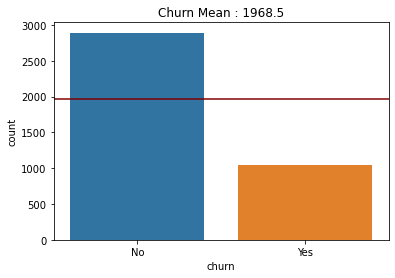

In [14]:
get_churn_mean_bar(train)

In [15]:
train.churn.value_counts(normalize=True)

No     0.734315
Yes    0.265685
Name: churn, dtype: float64

### It appears that about 26% of telco customers churn.

In [16]:
# Baseline????

# Does having a high monthly charge affect churn?

### I appears that monthly charges has some bearing on customer churn. Customers who have less monthly charges appear to have stayed with Telco.


<AxesSubplot:title={'center':'Monthly Charges vs Churn'}, xlabel='monthly_charges', ylabel='Count'>

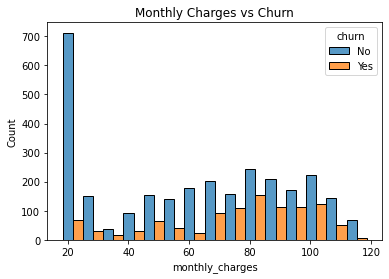

In [17]:
plt.title('Monthly Charges vs Churn')
sns.histplot(x='monthly_charges', data=train, hue='churn',multiple='dodge')

<AxesSubplot:title={'center':'Monthly Charges vs Churn'}, xlabel='churn', ylabel='monthly_charges'>

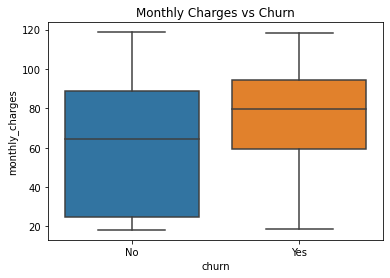

In [18]:
plt.title('Monthly Charges vs Churn')
sns.boxplot(y=train.monthly_charges, x=train.churn,
            whis=np.inf
           )

### Stat Test T-test

In [19]:
'''
Hypothesis 
Does monthly charges have a relationship with churn? 

Variables:
* monthly charges (continuous)
* churn(discrete)

Test: T-test two tail one sample scipy.stats.ttest_ind

$H_0$: Mean tenure of Telco customers who churn == mean tenure of Telco customers who do not churn.

$H_a$: Tean tenure of Telco customers who churn != mean tenure of Telco customers who do not churn.
'''

subset_churn =train[train.churn==1]
subset_notchurn = train[train.churn ==0]

# # stats Levene test - returns p value. small p-value means unequal variances
stat, pval =stats.levene(subset_churn.monthly_charges, subset_notchurn.monthly_charges)


# high p-value suggests that the populations have equal variances

if pval < 0.05:
    print('inequal variance ==> set equl_var to False')
pval

alpha = 0.05

t_stat, p_val = stats.ttest_ind(subset_churn.monthly_charges, subset_notchurn.monthly_charges, equal_var = False)
print(f' t-stat:{stat}')
print(f' p-value:{pval}')

if pval/2 < 0.05:
    print('we can reject H0 ')
    
print(f'''
Because the p-value ({p_val}) is less than alpha value ({alpha}), we reject the null hypothesis''')

 t-stat:nan
 p-value:nan

Because the p-value (nan) is less than alpha value (0.05), we reject the null hypothesis


/opt/homebrew/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/homebrew/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


### REject null hypothesis there is significant difference between the means of of monthly charges of those who churn vs those who do not churn

#  Do Senior Citizens churn more than non-Senior Citizens?

<AxesSubplot:xlabel='senior_citizen', ylabel='Percent'>

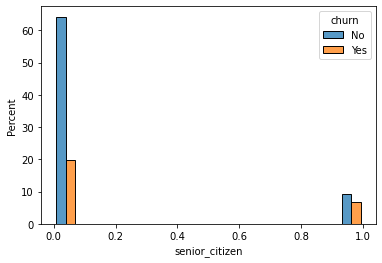

In [20]:
sns.histplot(data = train, x= train.senior_citizen, stat="percent", multiple="dodge", shrink=.8, hue='churn')
# sns.histplot(data = train, x=train.senior_citizen == 0, stat="percent")

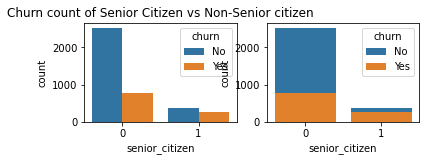

In [21]:
# (x='color', data=diamonds, hue='clarity'
plt.title('Churn count of Senior Citizen vs Non-Senior citizen')

plt.subplot(221)
plt.title('Churn count of Senior Citizen vs Non-Senior citizen')
sns.countplot(x=train.senior_citizen, data=train, hue = 'churn')


plt.subplot(222)
sns.countplot(x=train.senior_citizen, data=train, hue = 'churn',dodge=False)
plt.show()

### Stats Test Chi2 test

Do customers who are consider seniors churn more than customers who are not seniors?

Variables:

    * seniors (discrete)
    * churn (discrete)
    
Test: chi^2

$H_0$: There is **no** relationship between a customers with senior status and churn.

$H_a$: There is a relationship between a customers senior status and churn.

In [22]:
# Chi-Square test to compare two categorical variables (Sex and Survival)

alpha = 0.05

# Setup a crosstab of observed 
observed = pd.crosstab(train.senior_citizen==1, train.churn)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis")
    
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")
p

Reject the null hypothesis


1.7561315684822695e-23

### Since we reject the null hypethesis there seems an significant association between customers who are senior citizens and churn.

# Does tenure affect churn?

<AxesSubplot:title={'center':'Tenure vs Churn'}, xlabel='churn', ylabel='tenure'>

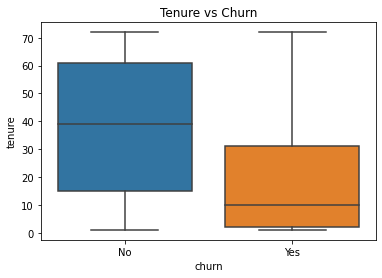

In [23]:
plt.title('Tenure vs Churn')
sns.boxplot(y=train.tenure, x=train.churn,
            whis=np.inf
           )

### Stats Test T-test

In [24]:
'''
Hypothesis 
Does tenure have a relationship with churn? 

Variables:
* tenure (continuous)
* churn(discrete)

Test: T-test two tail one sample scipy.stats.ttest_ind

$H_0$: Mean tenure of Telco customers who churn == mean tenure of Telco customers who do not churn.

$H_a$: Tean tenure of Telco customers who churn != mean tenure of Telco customers who do not churn.
'''
subset_churn =train[train.churn==1]
subset_notchurn = train[train.churn ==0]

# # stats Levene test - returns p value. small p-value means unequal variances
stats.levene(subset_churn.tenure, subset_notchurn.tenure)

# high p-value suggests that the populations have equal variances

if pval < 0.05:
    print('inequal variance ==> set equl_var to False')
pval

alpha = 0.05

t_stat, p_val = stats.ttest_ind(subset_churn.tenure, subset_notchurn.tenure, equal_var = False)
print(f' t-stat:{stat}')
print(f' p-value:{pval}')

if pval/2 < 0.05:
    print('we can reject H0 ')
    
print(f'''
Because the p-value ({p_val}) is less than alpha value ({alpha}), we reject the null hypothesis''')

 t-stat:nan
 p-value:nan

Because the p-value (nan) is less than alpha value (0.05), we reject the null hypothesis


/opt/homebrew/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/homebrew/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


### Since we reject the null hypothesis there appears to be a significant difference in the tenure means of customers who churn and those who do not churn

# Does the contract type of customer affect churn?

<AxesSubplot:title={'center':'Contract Type vs Churn'}, xlabel='contract_type', ylabel='count'>

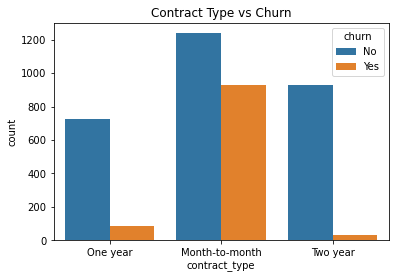

In [25]:
plt.title('Contract Type vs Churn')
sns.countplot(x=train.contract_type, data=train, hue = 'churn')


<AxesSubplot:xlabel='contract_type', ylabel='Percent'>

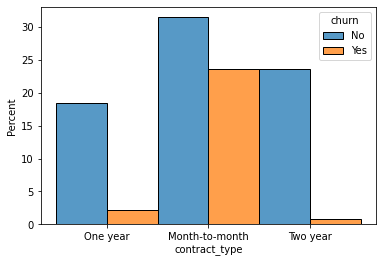

In [26]:
sns.histplot(data = train, x=train.contract_type, stat="percent", hue = 'churn', multiple = 'dodge')

In [27]:
train.contract_type.value_counts()

Month-to-month    2165
Two year           957
One year           815
Name: contract_type, dtype: int64

In [28]:
pd.crosstab(train.contract_type, train.churn)

churn,No,Yes
contract_type,,
Month-to-month,1238,927
One year,726,89
Two year,927,30


### Stats TEST Chi2

In [29]:
# Chi-Square test to compare two categorical variables (Contract type vs Churn)

alpha = 0.05

# Setup a crosstab of observed 
observed = pd.crosstab(train.contract_type, train.churn)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis")
    
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")
p

Reject the null hypothesis


4.693667062132269e-145

### There appears to be a significant association between contract type and churn

# Do Senior Citizens pay more monthly charges that non Senior Citizens?

<AxesSubplot:title={'center':'High monthly charges Drive Senior Citizens to Churn'}, xlabel='senior_citizen', ylabel='monthly_charges'>

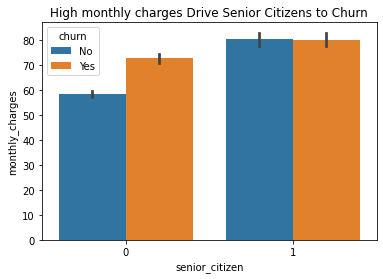

In [30]:
plt.title('High monthly charges Drive Senior Citizens to Churn')
sns.barplot(data= train, x='senior_citizen', y='monthly_charges', hue = 'churn')

Hypothesis for Senior citizens and Monthly charges
Do customers who are consider seniors pay more monthly charges than customers who are not seniors? 

Variables:
* seniors (discrete)
* month charges(continuous)

Test: two sample, one tail, scipy.stats.ttest_ind

$H_0$: The mean monthly charges for senior citizens <= to the mean monthly charges of non senior citizens.

$H_a$: The mean monthly charges for senior citizens <= to the mean monthly charges of non senior citizens.

In [31]:
total_charges_seniors = train[train.senior_citizen==1].total_charges
total_charges_nonseniors = train[train.senior_citizen==0].total_charges

In [32]:
total_charges_seniors.var(),total_charges_nonseniors.var()

(5790251.037615047, 5042349.88999738)

In [33]:
# # stats Levene test - returns p value. small p-value means unequal variances
stat, pval = stats.levene(total_charges_seniors, total_charges_nonseniors)

# high p-value suggests that the populations have equal variances

if pval < 0.05:
    print('inequal variance ==> set equal_var to False')
pval

inequal variance ==> set equal_var to False


3.1878395780060806e-05

In [34]:
alpha = 0.05

t_stat, p_val = stats.ttest_ind(total_charges_seniors, total_charges_nonseniors, equal_var = False)
print(f' t-stat:{stat}')
print(f' p-value:{pval}')

if pval/2 < 0.05:
    print('we can reject H0 ')
    
print(f'''
Because the p-value ({p_val}) is less than alpha value ({alpha}), we reject the null hypothesis''')

 t-stat:17.342703226071816
 p-value:3.1878395780060806e-05
we can reject H0 

Because the p-value (2.0722062265570932e-10) is less than alpha value (0.05), we reject the null hypothesis


### Summary:
### Since we reject the null hypothesis, there seems to be significant findings that senior citizens on average do pay more Monthly Charges than non senior citizens.m

# Does gender influence churn?

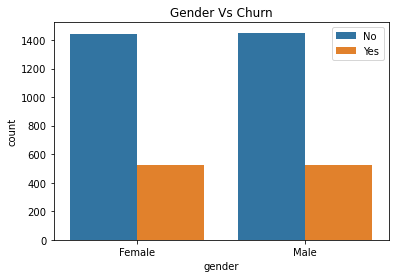

In [35]:
plt.title('Gender Vs Churn')
sns.countplot(x=train.gender, data=train, hue = 'churn')

plt.legend()
plt.show()

There does not seem to be a relationhip between churn and gender

### Stats Test Chi2

In [36]:
'''
Hypothesis 
Gender vs churn

Variables:
* gender(discrete)
* churn(discrete)

Test: 

$H_0$: There is **no** relationship between a customers and tenure.

$H_a$: There is a relationship between a customers and tenure.
'''
    
print (pd.crosstab(train.contract_type, train.churn))

# Chi-Square test to compare two categorical variables (Sex and Survival)


alpha = 0.05

# Setup a crosstab of observed survival to pclass
observed = pd.crosstab(train.gender, train.churn)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis")
    
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")
p

churn             No  Yes
contract_type            
Month-to-month  1238  927
One year         726   89
Two year         927   30
Fail to reject the null
Insufficient evidence to reject the null


1.0

WE fail to reject the null hypothesis so threre is no association between gender and churn

### It does not appear like gender has and influence on churn

# Does partner affect the churn?

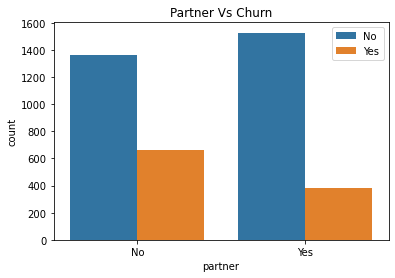

In [37]:
plt.title('Partner Vs Churn')
sns.countplot(x=train.partner, data=train, hue = 'churn')

plt.legend()
plt.show()

### There seems to be a relationship between partner and churn

# Stats Test Chi2

In [38]:
'''
Hypothesis 
partner vs churn

Variables:
* partner(discrete)
* churn(discrete)

Test: 

$H_0$: There is **no** relationship between a customers and partner

$H_a$: There is a relationship between a customers and partner.
'''
    
print (pd.crosstab(train.partner, train.churn))

# Chi-Square test to compare two categorical variables (Sex and Survival)


alpha = 0.05

# Setup a crosstab of observed survival to pclass
observed = pd.crosstab(train.partner, train.churn)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis")
    
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")
p

churn      No  Yes
partner           
No       1364  663
Yes      1527  383
Reject the null hypothesis


3.578598859815084e-19

### WE reject the null hypothesis so there is an association between partner anc churn

# Exploration Summary
* Monthly Charges is a driver of churn
* Senior Citizen status is a driver of churn
* Tenure is a driver of churn
* Partner is a driver of churn
* Gender is not a driver of churn


# Features that will be included in my model

* Monthly charges  has a significant statitical relationship to churn
* Senior Citizen  has a significant statitical relationship to churn
* Tenure  has a significant statitical relationship to churn
* Partner  has a significant statitical relationship to churn

# Features that will not be included in my model

* Gender did not have a statistical significant relationship to churn.
* Other features have unknow significance to churn at the moment
    * given more time to I would determined significance to churn.

# Modeling

* Accuracy is the metric use in the models
* Churn customers makeup 26.5% of the data 
* by guessing non-churn for every customer one could achieve an accuracy of 73.5%
* 73.5% will be the baseline accuracy I use for this project 

* I will be evaluating models developed using four different model types and various hyperparameter configurations

* Models will be evaluated on train and validate data

* The model that performs the best will then be evaluated on test data

In [39]:
train.columns.to_list()

['gender',
 'senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'monthly_charges',
 'total_charges',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type',
 'gender_Female',
 'gender_Male',
 'partner_No',
 'partner_Yes',
 'dependents_No',
 'dependents_Yes',
 'phone_service_No',
 'phone_service_Yes',
 'multiple_lines_No',
 'multiple_lines_No phone service',
 'multiple_lines_Yes',
 'online_security_No',
 'online_security_No internet service',
 'online_security_Yes',
 'online_backup_No',
 'online_backup_No internet service',
 'online_backup_Yes',
 'device_protection_No',
 'device_protection_No internet service',
 'device_protection_Yes',
 'tech_support_No',
 'tech_support_No internet service',
 'tech_support_Yes',
 'streaming_tv_No',
 'streaming_tv_No internet service',
 'streaming_tv_Yes',
 'stre

In [79]:
def model_prep(train,validate,test):
    
        # drop unused columns 
        features = ['monthly_charges','senior_citizen','tenure','partner_No','partner_Yes','churn']

        train = train[features]
        validate = validate[features]
        test = test[features]
        
       

        
        #seperate target
        
         
        x_train = train.drop(columns=['churn'])
        y_train = train.churn

        x_validate = validate.drop(columns=['churn'])
        y_validate = validate.churn

        x_test = test.drop(columns=['churn'])
        y_test = test.churn
        
        # Convert binary categorical targer variable to numeric
        y_train.churn= train.churn.map({'Yes': 1, 'No': 0})
        y_validate.churn = validate.churn.map({'Yes': 1, 'No': 0})
        y_test.churn = test.churn.map({'Yes': 1, 'No': 0})
        
       

        return x_train,y_train,x_validate,y_validate, x_test, y_test

In [80]:
# prep data for modeling
x_train,y_train,x_validate,y_validate, x_test, y_test = model_prep(train,validate,test)

In [81]:
x_train.shape, x_validate.shape, x_test.shape

((3937, 5), (1688, 5), (1407, 5))

# Decision Tree

In [90]:
DecisionTreeClassifier?


In [148]:

metrics = []

for i in range(1, 25):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(x_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = tree.score(x_train, y_train)
    
    out_of_sample_accuracy = tree.score(x_validate, y_validate)

    output = {
        "i": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df_2 = pd.DataFrame(metrics)
df_2["difference"] = df_2.train_accuracy - df_2.validate_accuracy
df_2

,i,train_accuracy,validate_accuracy,difference
0,1,0.734315,0.734005,0.000311
1,2,0.786640,0.776066,0.010573
2,3,0.786640,0.776066,0.010573
3,4,0.797816,0.774289,0.023526
4,5,0.805436,0.776659,0.028777
5,6,0.810262,0.764810,0.045451
6,7,0.817882,0.768365,0.049517
7,8,0.831852,0.764218,0.067634
8,9,0.846584,0.750000,0.096584
9,10,0.863602,0.746445,0.117156


In [150]:
df_2[df_2.validate_accuracy > .77]

,i,train_accuracy,validate_accuracy,difference
1,2,0.786640,0.776066,0.010573
2,3,0.786640,0.776066,0.010573
3,4,0.797816,0.774289,0.023526
4,5,0.805436,0.776659,0.028777


### Decision Tree Best Model

In [151]:
# for decision tree the best model has  max_depth of 3.
# 3	0.786640	0.776066	0.010573
tree = DecisionTreeClassifier(max_depth=3, random_state=123)

# Fit the model (on train and only train)
tree = tree.fit(x_train, y_train)

# Random Forest

In [170]:
metrics=[]
for h in range(10,0,-1):
   
    print(f'max depth {h}')
    
    for i in range(1, 21):
  
    # Make the model
        random_forest = RandomForestClassifier(max_depth=h, min_samples_leaf = i , random_state=123)
    
    # Fit the model (on train and only train)
        random_forest.fit(x_train, y_train)
        
         # Use the model
    # We'll evaluate the model's performance on train, first
        in_sample_accuracy = random_forest.score(x_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
        y_pred = random_forest.predict(x_train)
        
        output = {
        "max_depth": h,
        "min_samples_leaf": i,
        "train_accuracy": in_sample_accuracy,
        #"validate_accuracy": y_pred
    }

        metrics.append(output)
        
        df = pd.DataFrame(metrics)
df
  
 

max depth 10
max depth 9
max depth 8
max depth 7
max depth 6
max depth 5
max depth 4
max depth 3
max depth 2
max depth 1


In [131]:
metrics=[]
for h in range(10,0,-1):
   
    print(f'max depth {h}')
    
    for i in range(1, 21):
  
    # Make the model
        random_forest = RandomForestClassifier(max_depth=h, min_samples_leaf = i , random_state=123)
    
    # Fit the model (on train and only train)
        random_forest = random_forest.fit(x_train, y_train)
        
         # Use the model
    # We'll evaluate the model's performance on train, first
        in_sample_accuracy = random_forest.score(x_train, y_train)
        
    
        out_of_sample_accuracy = random_forest.score(x_validate, y_validate)


    # Use the model
    # We'll evaluate the model's performance on train, first
        y_pred = random_forest.predict(x_train)
        
        output = {
        "max_depth": h,
        "min_samples_leaf": i,
        "train_accuracy": in_sample_accuracy,
         "validate_accuracy": out_of_sample_accuracy   
      
    }

        metrics.append(output)
        
        df_2 = pd.DataFrame(metrics)



        df_2["difference"] = df_2.train_accuracy - df_2.validate_accuracy
df_2

max depth 10
max depth 9
max depth 8
max depth 7
max depth 6
max depth 5
max depth 4
max depth 3
max depth 2
max depth 1


,max_depth,min_samples_leaf,train_accuracy,validate_accuracy,difference
0,10,1,0.885192,0.771327,0.113865
1,10,2,0.866904,0.776659,0.090245
2,10,3,0.856744,0.774289,0.082455
3,10,4,0.847092,0.774289,0.072803
4,10,5,0.842012,0.774882,0.067130
...,...,...,...,...,...
195,1,16,0.734315,0.734005,0.000311
196,1,17,0.734315,0.734005,0.000311
197,1,18,0.734315,0.734005,0.000311
198,1,19,0.734315,0.734005,0.000311


In [141]:
df_2[df_2.validate_accuracy>.784]

,max_depth,min_samples_leaf,train_accuracy,validate_accuracy,difference
83,6,4,0.812548,0.784360,0.028187
85,6,6,0.812802,0.784360,0.028441
117,5,18,0.805690,0.784953,0.020737


### Best Model Random Forest

In [143]:
#Random Forest best model 5	18	0.805690	0.784953	0.020737
# Make the model
random_forest = RandomForestClassifier(max_depth=5, min_samples_leaf = 18 , random_state=123)
    
# Fit the model (on train and only train)
random_forest = random_forest.fit(x_train, y_train)

# KNN

In [176]:
# iteration:
metrics = []

for i in range(1,10):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(x_train, y_train)
    
    model_accuracies = {
        'train_score': round(clf.score(x_train, y_train), 2),
        'validate_score': round(clf.score(x_validate, y_validate), 2)}
    
    metrics.append(model_accuracies)
    df = pd.DataFrame(metrics)


df

,train_score,validate_score
0,0.99,0.71
1,0.86,0.75
2,0.86,0.74
3,0.84,0.76
4,0.84,0.75
5,0.82,0.76
6,0.82,0.77
7,0.82,0.76
8,0.82,0.76


In [177]:
df.train_score-df.validate_score

0    0.28
1    0.11
2    0.12
3    0.08
4    0.09
5    0.06
6    0.05
7    0.06
8    0.06
dtype: float64

# Best Model

In [ ]:
#6	0.82	0.77



# Logistic Regression